In [91]:
from sympy import *
init_printing(use_unicode=True)

In [92]:
x,t = symbols('x t')
C,K,Q,V,u=symbols('C K Q V u')

A=symbols('A')
dx=symbols("\Delta_x")
dt=symbols("\Delta_t")

In [118]:
if 0:
    C_t=Derivative(C,t)
    C_tt=Derivative(C,t,2)
    C_ttt=Derivative(C,t,3)
    C_x=Derivative(C,x)
    C_xx=Derivative(C,x,2)
    C_xxx=Derivative(C,x,3)
else:
    C_t,C_tt,C_ttt,C_x,C_xx,C_xxx=symbols('C_t C_tt C_ttt C_x C_xx C_xxx')
    u_t = symbols('u_t')
    

In [120]:
pde=C_t + u*C_x - K*C_xx 
pde

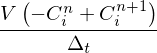

In [121]:
Ci0n0 = symbols("C_i^n")
Ci0n1 = symbols("C_i^{n+1}")
Ci1n0 = symbols("C_{i+1}^n")
Cim1n0 = symbols("C_{i-1}^n")
accum=V*(Ci0n1 - Ci0n0)/dt
accum

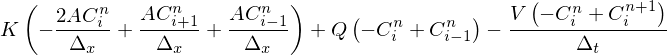

In [122]:
# assume Q>0
flux_in=Q*Cim1n0 + K*A/dx*Ci1n0 + K*A/dx*Cim1n0
flux_out=Q*Ci0n0 + 2*K*A/dx*Ci0n0
eq=flux_in - flux_out - accum
eq=collect(eq,[K,Q]) # a little nicer
eq

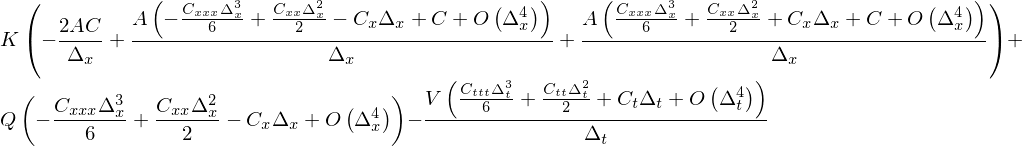

In [123]:
# now substitue taylor expansions
eqsub=eq
eqsub=(eqsub.subs(Ci0n0,C)
       .subs(Ci1n0, C+dx*C_x + dx**2/2*C_xx + dx**3/6*C_xxx + Order(dx**4))
       .subs(Cim1n0,C-dx*C_x + dx**2/2*C_xx - dx**3/6*C_xxx + Order(dx**4))
       .subs(Ci0n1, C+dt*C_t + dt**2/2*C_tt + dt**3/6*C_ttt + Order(dt**4)))
eqsub

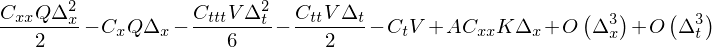

In [103]:
simplify(eqsub)

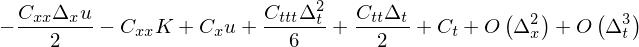

In [105]:
eqsub2=eqsub.subs(Q,u*A).subs(V,A*dx)
simplify(eqsub2)
eqsub2=simplify(-eqsub2/A/dx)
eqsub2

Solves this PDE:


With truncation error:


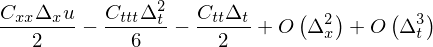

In [124]:
trunc=pde-eqsub2
print("Solves this PDE:")
display(pde)
print("With truncation error:")
display(trunc)

Numerical diffusion coefficient is then


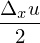

In [125]:
print("Numerical diffusion coefficient is then")
display(trunc.coeff(C_xx))

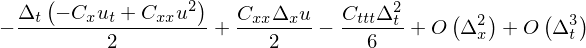

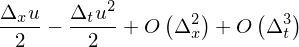

In [132]:
# But what about that C_tt term?
# if it were straight advection, then
# C_t = -u C_x 
# can take the time derivative of that:
# C_tt = -u_t * C_x - u C_xt
#      = -u_t * C_x - u (C_t)_x
#      = -u_t * C_x - u (-u C_x)_x
#      = -u_t * C_x + u^2 C_xx

trunc2=trunc.subs(C_tt,-u_t*C_x + u**2 * C_xx)
display(trunc2)
trunc2=trunc2.expand().collect(C_xx).coeff(C_xx)
trunc2

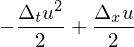

CFL:


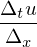

Numerical diffusion coefficient


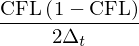

In [141]:

display( (u*dx - u**2*dt)/2)
# 0.5*u/dx( 1 - u*dt/dx)
# 0.5/dt * (u*dt/dx) ( 1- u*dt/dx)
CFL=symbols('\mathrm{CFL}')
print("CFL:")
display(u*dt/dx)
print('Numerical diffusion coefficient')
display(1/(dt*2) * CFL *( 1- CFL))

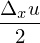

In [136]:
# Compare to
# https://scicomp.stackexchange.com/questions/16130/how-can-i-prove-numerical-diffusion-in-upwind-scheme-for-transport-equation
u * dx/2 

Conclusions:
 * No numerical diffusion from the diffusion operator.  So to the extent that mean advection can be removed
   then the numerical diffusion that is extracted would not be contaminated.
 * Decreasing the timestep *increases* the numerical diffusion, towards $u \Delta x/2$
 * Is it possible to evaluate the numerical diffusion of the advection operator by extracting the full transport
   matrix $T$, take just the advective component, integrate that forward and backward, and 
   estimate the diffusion of that matrix?
   